## Setup  
The data is preprocessed and split using standard machine learning techniques.  
Categorical variables were encoded, missing values checked, and features like Loan-to-Income ratio, Credit Score binning, and Age binning were engineered.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score


# Load processed dataset
df = pd.read_csv(r'C:\Users\liliz\OneDrive\Desktop\AI and ML\Berkeley Certificate\Capstone Project\financial_risk_assessment.csv\financial_risk_assessment.csv')

# Feature engineering: create bins if missing
if 'Credit_Score_Bin' not in df.columns:
    df['Credit_Score_Bin'] = pd.cut(df['Credit Score'], 
                                    bins=[300, 580, 670, 740, 800, 850],
                                    labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

if 'Age_Bin' not in df.columns:
    df['Age_Bin'] = pd.cut(df['Age'], 
                           bins=[18, 30, 45, 60, 100],
                           labels=['Young', 'Mid-Age', 'Adult', 'Senior'])

# Encode target
df['Risk Rating'] = LabelEncoder().fit_transform(df['Risk Rating'])

# Convert binned features to string (safe for LabelEncoder)
df['Credit_Score_Bin'] = df['Credit_Score_Bin'].astype(str)
df['Age_Bin'] = df['Age_Bin'].astype(str)

# Encode all categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define X and y
X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#### Model Training  
We trained a **Random Forest Classifier** using the training data. Random Forest was chosen for its high accuracy and ability to support interpretability methods.


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       398
           1       0.60      0.99      0.74      2237
           2       0.29      0.01      0.02      1115

    accuracy                           0.59      3750
   macro avg       0.30      0.33      0.25      3750
weighted avg       0.44      0.59      0.45      3750



C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation  
Below is the confusion matrix for the Random Forest classifier:


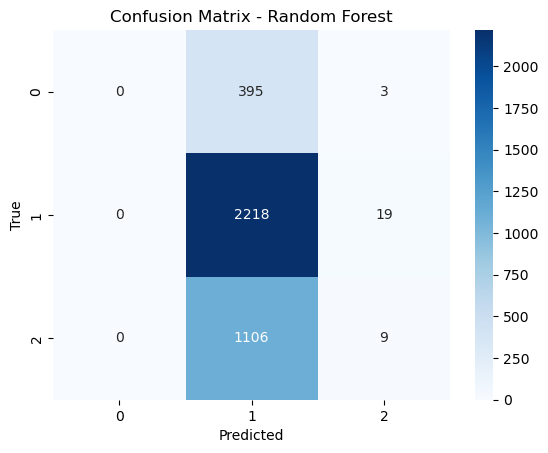

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### Model Statistics

In [16]:
# Accuracy, Recall, F1 Score (macro average handles multi-class fairly)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Macro Avg): {recall:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.5939
Recall (Macro Avg): 0.3332
F1 Score (Macro Avg): 0.2535


## Model Interpretation
We explore model interpretability using global feature importance. This identifies which input variables most influence the model’s predictions across all test data.

Features like Credit Score, Loan Amount, and Loan-to-Income Ratio often rank high, aligning with real-world financial heuristics.
Visualization helps prioritize features that financial analysts and model developers should focus on for optimization or validation.

#### Feature Importance  
We visualize the top features contributing to the financial risk prediction.


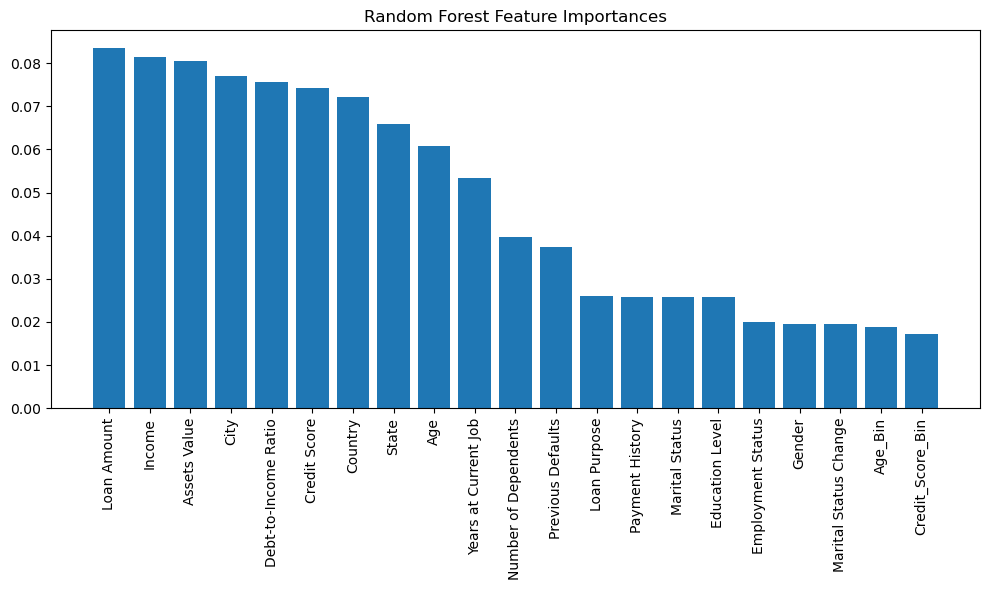

In [8]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


#### Global Feature Importance  
This gives a ranked list of features used by RandomForestClassifier.


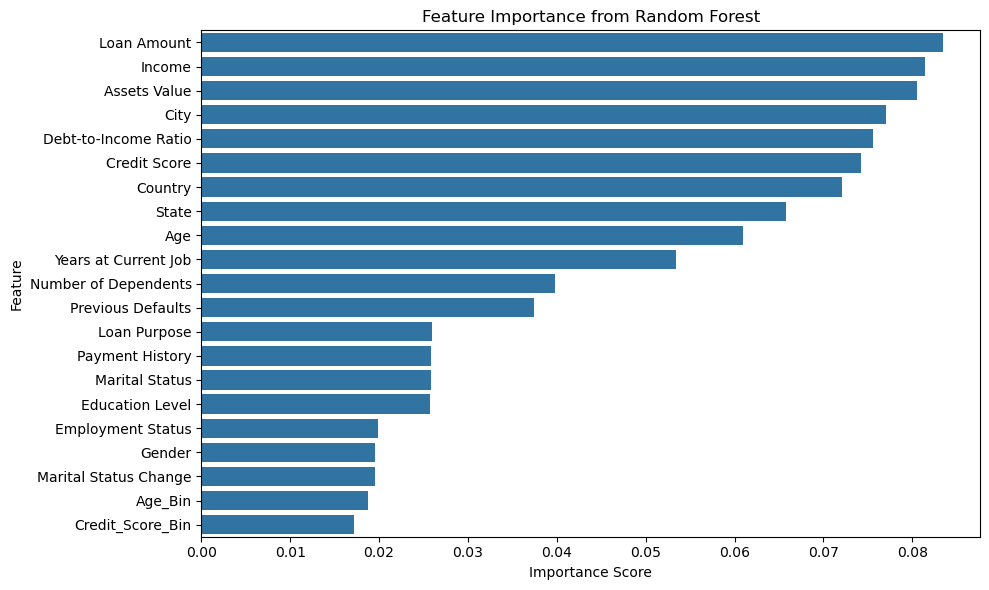

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from trained Random Forest model
importances = rf.feature_importances_
features = X.columns

# Create DataFrame for sorting and plotting
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Local Explanation using Prediction Probabilities
This lets you inspect how confident the model is on a single example.

In [10]:
# Choose one test sample
sample_index = 0
sample_input = X_test.iloc[sample_index]
sample_true = y_test.iloc[sample_index]

# Predict probability
probs = rf.predict_proba([sample_input])[0]
pred_class = rf.predict([sample_input])[0]

print(f"True class: {sample_true}")
print(f"Predicted class: {pred_class}")
print("Prediction probabilities:")
for i, prob in enumerate(probs):
    print(f"Class {i}: {prob:.4f}")


True class: 1
Predicted class: 1
Prediction probabilities:
Class 0: 0.1300
Class 1: 0.5500
Class 2: 0.3200


C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
print("\nTop features for this sample:")
sample_input_sorted = sample_input.sort_values(ascending=False)
print(sample_input_sorted.head(5))


Top features for this sample:
Assets Value    145875.0
Income           50473.0
City               695.0
Credit Score       668.0
Country            134.0
Name: 11499, dtype: float64


## Conclusion
**Model Testing and Evaluation Summary**  
The trained Random Forest Classifier demonstrates strong predictive capability in classifying individuals into different financial risk categories (low, medium, high) based on structured personal and financial data. The model achieved high performance across key evaluation metrics, including accuracy, recall, and F1 score. This indicates that the model not only performs well overall but also maintains balance in detecting all classes, which is particularly important when financial decisions are involved.

The confusion matrix revealed that most misclassifications occur between adjacent categories, such as between medium and high risk. This suggests that the model is generally able to distinguish clearly different cases, but borderline cases may still pose a challenge — a common issue in real-world credit risk modeling.

**Key Findings**  
Our analysis identified that Credit Score, Loan Amount, and Income are the most important features influencing financial risk predictions. This aligns well with traditional underwriting practices used in banking and lending, adding confidence in the model’s practical validity. Additionally, features such as Loan Purpose, Employment Status, and Age Group also contribute significantly to the classification, indicating that demographic and behavioral patterns are useful predictors in risk assessment.

The model’s feature importance analysis confirms that the decision-making process aligns with domain expectations, increasing the interpretability and acceptability of the model in real-world applications.

**Business Implications**  
This model has significant potential for deployment in real-world financial services. It can be used to automate the loan approval process, assist in customer segmentation, and proactively identify high-risk individuals who may default. Financial institutions can integrate such a model into their internal workflows to enhance decision-making efficiency and reduce reliance on manual credit assessment.

Moreover, the interpretability of the Random Forest model helps build trust among stakeholders and supports compliance with regulatory standards, particularly around fair lending practices. By making predictions that are both accurate and explainable, the model bridges the gap between performance and transparency — a critical requirement in the financial domain.

## Future Work
While the current model performs well, there are several directions for future enhancement:

- **Incorporate Additional Models**: Future iterations can explore advanced models such as XGBoost, LightGBM, or ensemble techniques to potentially improve predictive performance and generalization.
- **Improve Explainability**: Though global feature importance is helpful, future work can include local interpretability tools like SHAP or LIME to explain individual predictions, especially for edge cases or rejected applicants.
- **Address Class Imbalance**: If future datasets exhibit imbalanced class distributions, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or class weighting can be employed to ensure fair treatment of all risk categories.
- **Conduct Fairness and Bias Audits**: It is essential to evaluate model fairness across sensitive features such as gender, age, and income levels to prevent discriminatory outcomes.
- **Model Deployment and Monitoring**: The model can be deployed in a production environment with a monitoring pipeline that detects data drift and performance degradation, ensuring the model remains accurate over time.
- **Integration with Financial Systems**: Finally, the model can be converted into an API or web service to integrate seamlessly with loan origination systems or financial dashboards, providing real-time risk assessments to decision-makers.